# Vizualize And Analyze the Data 
File will analyze the means across different contexts and across different models including different influence of face saliency. Provides with plots of the results and saves them into chosen destination.

You have to pick a metric and provide a string for saving the files.

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

### Pick Metric
NSS, SIM, IG, AUC

In [2]:
plot_metric = 'SIM'

In [3]:
# pick directory
save_dir ='../report/plots/'

In [4]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_07.p',
 '2019-05-12_results-with-std.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '2019-05-11_results-with-std.p',
 '19-02-01_results_over_baseline_faces_03.p',
 '19-01-31_results.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_face_05.p']

## Pick the Dataset and Load Required Data

In [5]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [6]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [7]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))

#### Vizualize the inside of one of the models

In [8]:
model_f03

['aim_face_03',
 'cas_face_03',
 'covsal_face_03',
 'gbvs_face_03',
 'icf_face_03',
 'ik_face_03',
 'sun_face_03']

## Data Loading

### Get ID of the Metric

In [9]:
if plot_metric == 'NSS':
    metric_id = 0
elif plot_metric == 'SIM':
    metric_id = 1
elif plot_metric == 'IG':
    metric_id = 2
elif plot_metric == 'AUC':
    metric_id = 3
else:
    raise ValueError('Wrong metric name provided.')
    
metric_id

1

### Load the scores

In [10]:
scores = summary[:,:,metric_id]
f03_scores = summary_f03[:,:,metric_id]
f05_scores = summary_f05[:,:,metric_id]
f07_scores = summary_f07[:,:,metric_id]

## Change scores into DataFrames
### No Faces Data Frame

In [11]:
df = pd.DataFrame(data=scores, columns=model, index=context)
df.columns.name='models'
df.index.name='context'

df = df.transpose()
df

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.529256,0.504981,0.568607,0.472232,0.535764,0.478441
cas,0.521473,0.496486,0.561978,0.459220,0.525020,0.490274
covsal,0.528376,0.520976,0.540371,0.516241,0.507251,0.502744
gbvs,0.579692,0.547139,0.632463,0.532250,0.586402,0.524310
icf,0.540450,0.520813,0.572283,0.480500,0.534348,0.493894
ik,0.483443,0.458229,0.524316,0.440349,0.498116,0.439303
sun,0.436436,0.400730,0.494317,0.374971,0.449312,0.347440
dg,0.642767,0.630332,0.662924,0.623571,0.637034,0.623714
faces,0.380547,0.381124,0.324046,0.281475,0.410412,0.323161


#### Separate Faces From the rest of the results

In [12]:
faces = df.loc['faces']
df = df.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg']]

#### Get Mean Values across Contexts and Models

In [13]:
df['mean context'] = df.mean(axis=1)
df = df.transpose()
df['mean model'] = df.mean(axis=1)
df = df.transpose()
df

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.529256,0.504981,0.568607,0.472232,0.535764,0.478441,0.514880
cas,0.521473,0.496486,0.561978,0.459220,0.525020,0.490274,0.509075
covsal,0.528376,0.520976,0.540371,0.516241,0.507251,0.502744,0.519326
gbvs,0.579692,0.547139,0.632463,0.532250,0.586402,0.524310,0.567043
icf,0.540450,0.520813,0.572283,0.480500,0.534348,0.493894,0.523715
ik,0.483443,0.458229,0.524316,0.440349,0.498116,0.439303,0.473959
sun,0.436436,0.400730,0.494317,0.374971,0.449312,0.347440,0.417201
dg,0.642767,0.630332,0.662924,0.623571,0.637034,0.623714,0.636724
mean model,0.532737,0.509961,0.569657,0.487417,0.534156,0.487515,0.520240


In [14]:
df_mean_model = df.loc['mean model']
df_mean_context = df.transpose().loc['mean context']

### Faces with $\alpha$ = 0.3

In [15]:
df_f03 = pd.DataFrame(data=f03_scores, columns=model_f03, index=context_f03)
df_f03.columns.name='models'
df_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
df_f03 = df_f03.rename(index=str, columns=col).transpose()

df_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.535489,0.515820,0.567375,0.473084,0.547418,0.482798
cas,0.525728,0.503291,0.562292,0.459744,0.533971,0.493499
covsal,0.540867,0.540492,0.541474,0.519671,0.528012,0.510934
gbvs,0.583638,0.553899,0.631847,0.532606,0.594117,0.527445
icf,0.547291,0.531809,0.572388,0.482032,0.545444,0.500319
ik,0.490019,0.468970,0.524140,0.441561,0.508954,0.445144
sun,0.441578,0.409820,0.493058,0.375098,0.458578,0.350194


#### Get Mean Values across Contexts and Models

In [16]:
df_f03['mean context'] = df_f03.mean(axis=1)
df_f03 = df_f03.transpose()
df_f03['mean model'] = df_f03.mean(axis=1)
df_f03 = df_f03.transpose()
df_f03

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.535489,0.515820,0.567375,0.473084,0.547418,0.482798,0.520331
cas,0.525728,0.503291,0.562292,0.459744,0.533971,0.493499,0.513087
covsal,0.540867,0.540492,0.541474,0.519671,0.528012,0.510934,0.530241
gbvs,0.583638,0.553899,0.631847,0.532606,0.594117,0.527445,0.570592
icf,0.547291,0.531809,0.572388,0.482032,0.545444,0.500319,0.529880
ik,0.490019,0.468970,0.524140,0.441561,0.508954,0.445144,0.479798
sun,0.441578,0.409820,0.493058,0.375098,0.458578,0.350194,0.421388
mean model,0.523516,0.503443,0.556082,0.469114,0.530928,0.472905,0.509331


In [17]:
df_f03_mean_model = df_f03.loc['mean model']
df_f03_mean_context = df_f03.transpose().loc['mean context']

### Faces with $\alpha$ = 0.5

In [18]:
df_f05 = pd.DataFrame(data=f05_scores, columns=model_f05, index=context_f05)
df_f05.columns.name='models'
df_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
df_f05 = df_f05.rename(index=str, columns=col).transpose()

df_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.542495,0.527066,0.567506,0.475102,0.558768,0.488953
cas,0.530474,0.511503,0.561227,0.461105,0.540870,0.497408
covsal,0.550315,0.555510,0.541893,0.522584,0.543866,0.518601
gbvs,0.588542,0.561783,0.631919,0.533836,0.602438,0.531272
icf,0.552661,0.540406,0.572526,0.483636,0.554154,0.504156
ik,0.496925,0.480040,0.524296,0.443189,0.519886,0.451064
sun,0.448339,0.420649,0.493226,0.376733,0.469726,0.355033


#### Get Mean Values across Contexts and Models

In [19]:
df_f05['mean context'] = df_f05.mean(axis=1)
df_f05 = df_f05.transpose()
df_f05['mean model'] = df_f05.mean(axis=1)
df_f05 = df_f05.transpose()
df_f05

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.542495,0.527066,0.567506,0.475102,0.558768,0.488953,0.526648
cas,0.530474,0.511503,0.561227,0.461105,0.540870,0.497408,0.517098
covsal,0.550315,0.555510,0.541893,0.522584,0.543866,0.518601,0.538795
gbvs,0.588542,0.561783,0.631919,0.533836,0.602438,0.531272,0.574965
icf,0.552661,0.540406,0.572526,0.483636,0.554154,0.504156,0.534590
ik,0.496925,0.480040,0.524296,0.443189,0.519886,0.451064,0.485900
sun,0.448339,0.420649,0.493226,0.376733,0.469726,0.355033,0.427284
mean model,0.529964,0.513851,0.556085,0.470884,0.541387,0.478070,0.515040


In [20]:
df_f05_mean_model = df_f05.loc['mean model']
df_f05_mean_context = df_f05.transpose().loc['mean context']

### Faces with $\alpha$ = 0.7

In [21]:
df_f07 = pd.DataFrame(data=f07_scores, columns=model_f07, index=context_f07)
df_f07.columns.name='models'
df_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
df_f07 = df_f07.rename(index=str, columns=col).transpose()

df_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.549862,0.539012,0.567449,0.477050,0.569102,0.496495
cas,0.538440,0.524250,0.561443,0.463732,0.553208,0.503983
covsal,0.555271,0.563686,0.541629,0.524548,0.551776,0.524843
gbvs,0.595868,0.573428,0.632245,0.536224,0.614022,0.537579
icf,0.557546,0.548177,0.572734,0.485544,0.562260,0.506198
ik,0.505718,0.494144,0.524479,0.445401,0.532979,0.459770
sun,0.458123,0.436317,0.493472,0.379859,0.485290,0.363897


In [22]:
df_f07['mean context'] = df_f07.mean(axis=1)
df_f07 = df_f07.transpose()
df_f07['mean model'] = df_f07.mean(axis=1)
df_f07 = df_f07.transpose()
df_f07

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.549862,0.539012,0.567449,0.477050,0.569102,0.496495,0.533162
cas,0.538440,0.524250,0.561443,0.463732,0.553208,0.503983,0.524176
covsal,0.555271,0.563686,0.541629,0.524548,0.551776,0.524843,0.543626
gbvs,0.595868,0.573428,0.632245,0.536224,0.614022,0.537579,0.581561
icf,0.557546,0.548177,0.572734,0.485544,0.562260,0.506198,0.538743
ik,0.505718,0.494144,0.524479,0.445401,0.532979,0.459770,0.493749
sun,0.458123,0.436317,0.493472,0.379859,0.485290,0.363897,0.436159
mean model,0.537261,0.525574,0.556207,0.473194,0.552662,0.484681,0.521597


In [23]:
df_f07_mean_model = df_f07.loc['mean model']
df_f07_mean_context = df_f07.transpose().loc['mean context']

### Create Mean Matrices

In [24]:
mean_models = pd.DataFrame([df_mean_model, df_f03_mean_model, df_f05_mean_model, df_f07_mean_model], index=[0,0.3,0.5,0.7])

mean_models = mean_models.transpose()
mean_models = mean_models.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
mean_models

,0.0,0.3,0.5,0.7
context,,,,
all,0.532737,0.523516,0.529964,0.537261
person,0.509961,0.503443,0.513851,0.525574
no person,0.569657,0.556082,0.556085,0.556207
animal,0.487417,0.469114,0.470884,0.473194
electronic,0.534156,0.530928,0.541387,0.552662
sports,0.487515,0.472905,0.478070,0.484681


In [25]:
mean_contexts = pd.DataFrame([df_mean_context, df_f03_mean_context, df_f05_mean_context, df_f07_mean_context], index=[0,0.3,0.5,0.7])

mean_contexts = mean_contexts.transpose()
mean_contexts = mean_contexts.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
mean_contexts

,0.0,0.3,0.5,0.7
aim,0.514880,0.520331,0.526648,0.533162
cas,0.509075,0.513087,0.517098,0.524176
covsal,0.519326,0.530241,0.538795,0.543626
gbvs,0.567043,0.570592,0.574965,0.581561
icf,0.523715,0.529880,0.534590,0.538743
ik,0.473959,0.479798,0.485900,0.493749
sun,0.417201,0.421388,0.427284,0.436159


## Visualization of The Results

### Data Prep For separate Vizualization

In [26]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0 = df0.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context = df.transpose().loc[['mean context']]
df0_mean_context = df0_mean_context.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model = df.loc[['mean model']]
df0_mean_model = df0_mean_model.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [27]:
df0_f03 = df_f03.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0_f03 = df0_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context_f03 = df_f03.transpose().loc[['mean context']]
df0_mean_context_f03 = df0_mean_context_f03.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model_f03 = df_f03.loc[['mean model']]
df0_mean_model_f03 = df0_mean_model_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [28]:
df0_f05 = df_f05.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0_f05 = df0_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context_f05 = df_f05.transpose().loc[['mean context']]
df0_mean_context_f05 = df0_mean_context_f05.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model_f05 = df_f05.loc[['mean model']]
df0_mean_model_f05 = df0_mean_model_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [29]:
df0_f07 = df_f07.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0_f06 = df0_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context_f07 = df_f07.transpose().loc[['mean context']]
df0_mean_context_f07 = df0_mean_context_f07.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model_f07 = df_f07.loc[['mean model']]
df0_mean_model_f07 = df0_mean_model_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

### Make the Big Fancy Plot

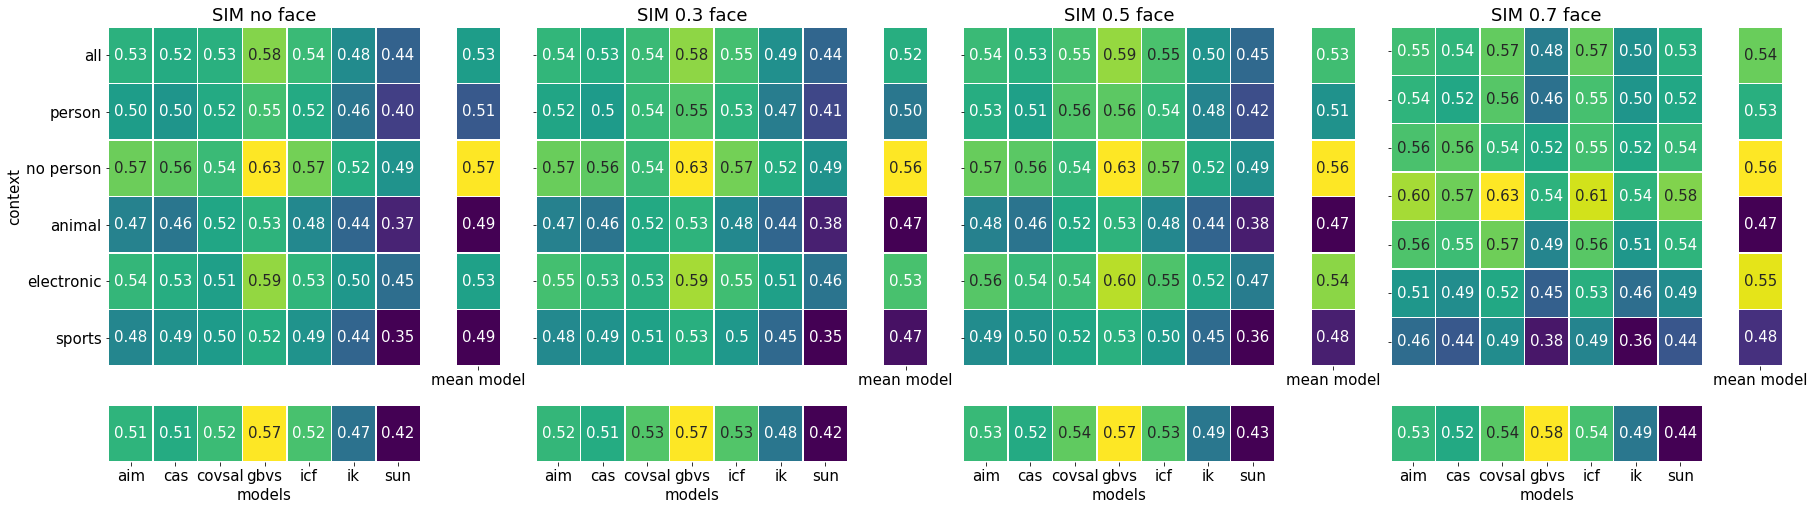

In [30]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 8,
                       width_ratios=[7, 1, 7, 1, 7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[8])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[10])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[12])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[14])

im = sns.heatmap(df0, annot=True, linewidths=.5, ax=ax01, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model, annot=True, linewidths=.5, ax=ax02, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context, annot=True, linewidths=.5, ax=ax03, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f03, annot=True, linewidths=.5, ax=ax11, cmap='viridis', cbar=False, xticklabels='');
sns.heatmap(df0_mean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f05, annot=True, linewidths=.5, ax=ax21, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f07, annot=True, linewidths=.5, ax=ax31, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('{} no face'.format(plot_metric));
ax11.set_title('{} 0.3 face'.format(plot_metric));
ax21.set_title('{} 0.5 face'.format(plot_metric));
ax31.set_title('{} 0.7 face'.format(plot_metric));
# plt.savefig(save_dir+'{}_sep_with_mean.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

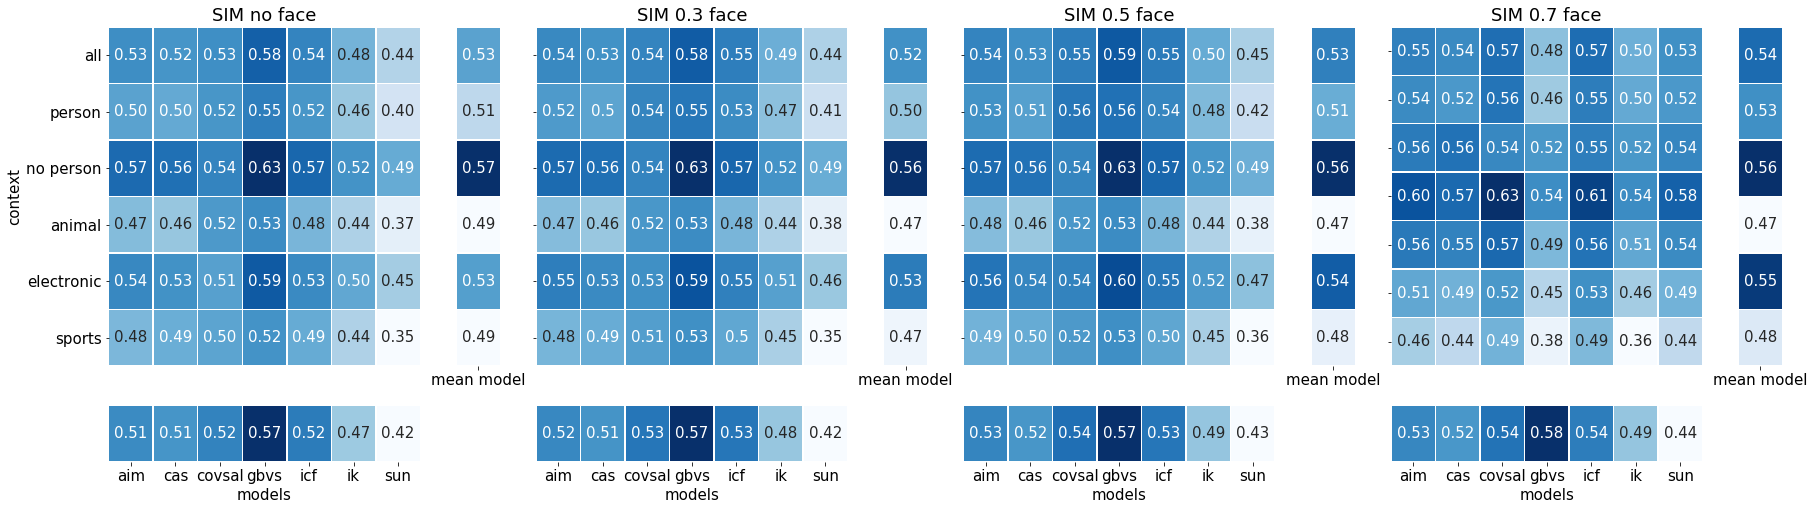

In [31]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 8,
                       width_ratios=[7, 1, 7, 1, 7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[8])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[10])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[12])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[14])

im = sns.heatmap(df0, annot=True, linewidths=.5, ax=ax01, cmap='Blues', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model, annot=True, linewidths=.5, ax=ax02, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context, annot=True, linewidths=.5, ax=ax03, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f03, annot=True, linewidths=.5, ax=ax11, cmap='Blues', cbar=False, xticklabels='');
sns.heatmap(df0_mean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f05, annot=True, linewidths=.5, ax=ax21, cmap='Blues', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f07, annot=True, linewidths=.5, ax=ax31, cmap='Blues', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='Blues', yticklabels='', cbar=False, fmt='.2f');

ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('{} no face'.format(plot_metric));
ax11.set_title('{} 0.3 face'.format(plot_metric));
ax21.set_title('{} 0.5 face'.format(plot_metric));
ax31.set_title('{} 0.7 face'.format(plot_metric));
# plt.savefig(save_dir+'{}_sep_with_mean.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

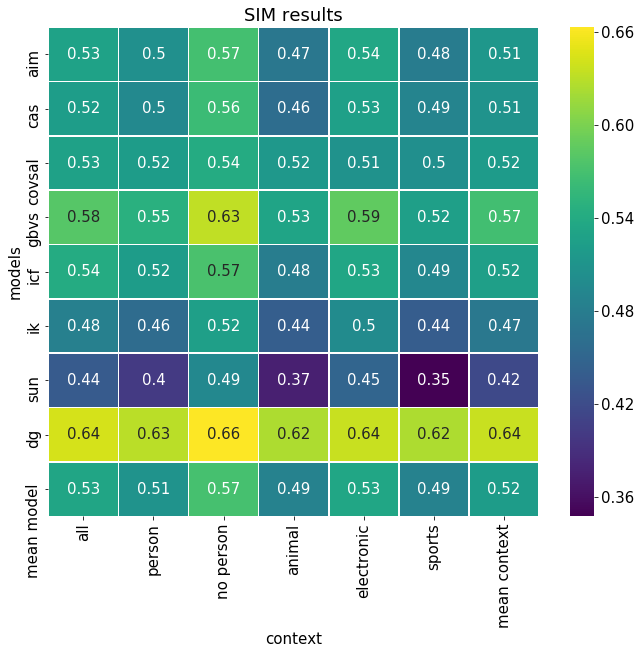

In [32]:
matplotlib.rcParams.update({'font.size': 15})

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('{} results'.format(plot_metric));

# plt.savefig(save_dir+'{}_all.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

## Visualization of The Means

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

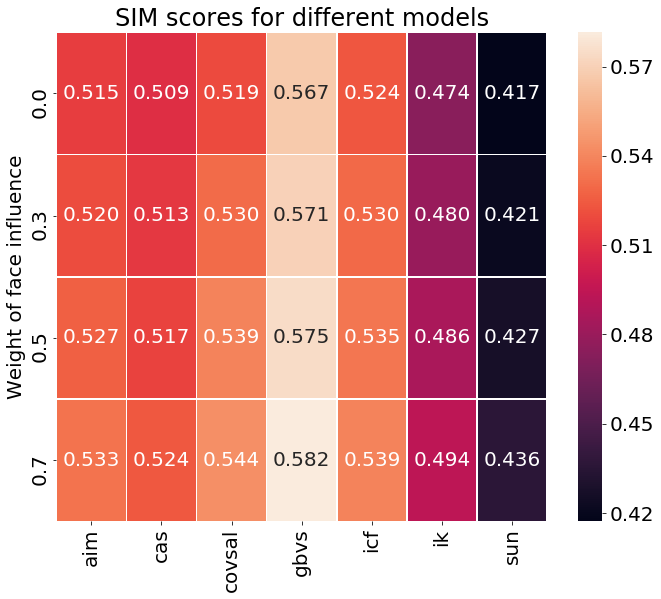

In [33]:
matplotlib.rcParams.update({'font.size': 20})

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.ylabel('Weight of face influence')
plt.title('{} scores for different models'.format(plot_metric));
plt.xticks(rotation=90)
# plt.savefig(save_dir+'{}_performance_mean_contexts.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

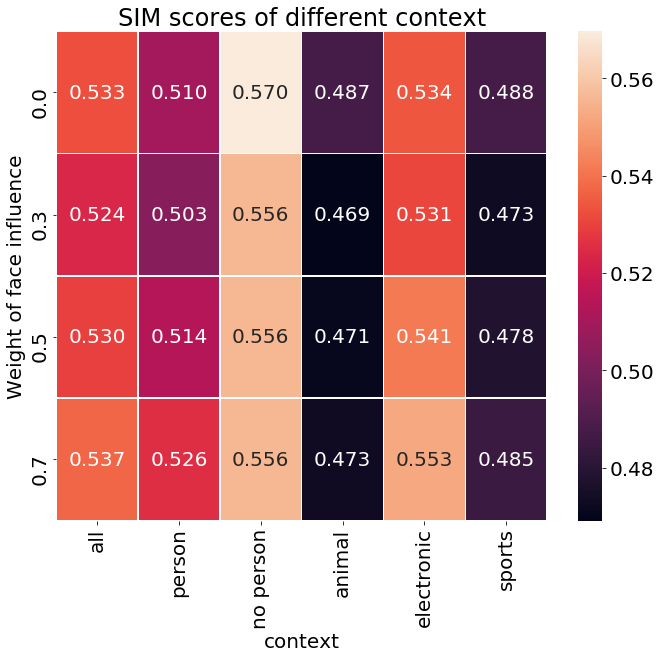

In [34]:
f, ax = plt.subplots(figsize=(11, 9))
matplotlib.rcParams.update({'font.size': 20})

sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.ylabel('Weight of face influence')
plt.title('{} scores of different context'.format(plot_metric));

# plt.savefig(save_dir+'{}_performance_mean_models.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

## Calculate The Relative Error

#### Drop DG for diff

In [35]:
df1 = df.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'mean model']]

In [36]:
df1

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.529256,0.504981,0.568607,0.472232,0.535764,0.478441,0.514880
cas,0.521473,0.496486,0.561978,0.459220,0.525020,0.490274,0.509075
covsal,0.528376,0.520976,0.540371,0.516241,0.507251,0.502744,0.519326
gbvs,0.579692,0.547139,0.632463,0.532250,0.586402,0.524310,0.567043
icf,0.540450,0.520813,0.572283,0.480500,0.534348,0.493894,0.523715
ik,0.483443,0.458229,0.524316,0.440349,0.498116,0.439303,0.473959
sun,0.436436,0.400730,0.494317,0.374971,0.449312,0.347440,0.417201
mean model,0.532737,0.509961,0.569657,0.487417,0.534156,0.487515,0.520240


In [37]:
df_diff_f03 = ((df_f03 - df1) / df1)*100
df_diff_f05 = ((df_f05 - df1) / df1)*100
df_diff_f07 = ((df_f07 - df1) / df1)*100

#### Get mean of models and mean of contexts in diff out

#### Diff Models (analyse across contexts)

In [38]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
context,,,
all,-1.730887,-0.520403,0.849288
person,-1.278146,0.762834,3.061536
no person,-2.383068,-2.382606,-2.361077
animal,-3.755110,-3.391980,-2.917933
electronic,-0.604391,1.353682,3.464629
sports,-2.996903,-1.937462,-0.581364
mean context,-2.096986,-0.999622,0.260676


#### Diff Contexts (analyse across models)

In [39]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
models,,,
aim,1.058584,2.285554,3.550625
cas,0.788097,1.575921,2.966296
covsal,2.101781,3.748760,4.679019
gbvs,0.625911,1.397153,2.560360
icf,1.177258,2.076493,2.869597
ik,1.231830,2.519293,4.175296
sun,1.003598,2.416950,4.544236
mean model,-2.096986,-0.999622,0.260676


## Vizualize relative errors

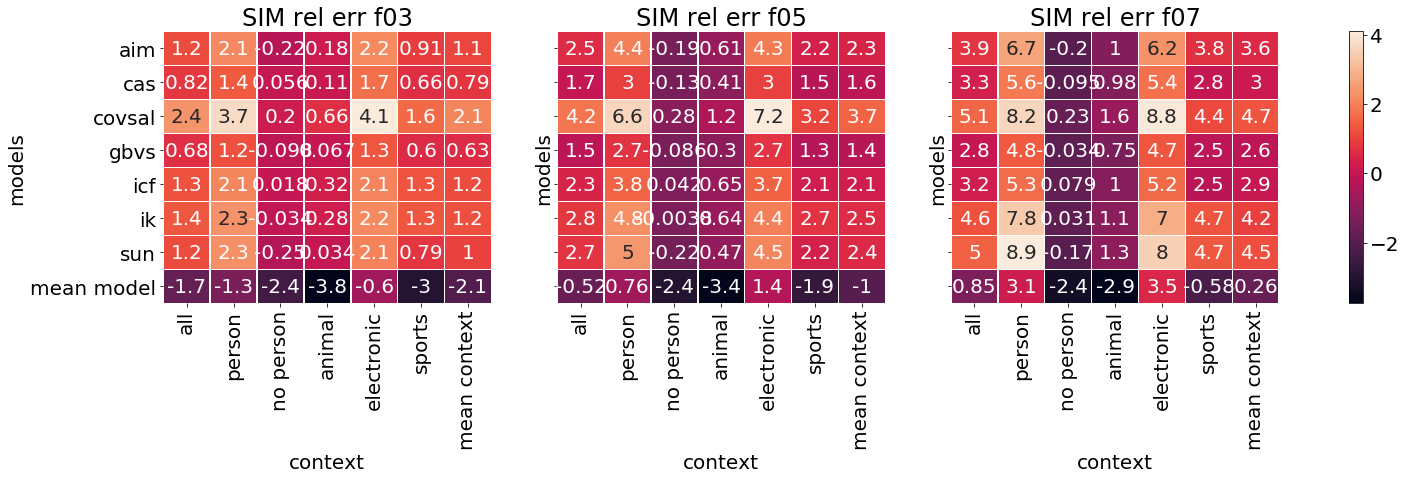

In [40]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(df_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(df_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(df_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('{} rel err f03'.format(plot_metric));
ax[1].set_title('{} rel err f05'.format(plot_metric));
ax[2].set_title('{} rel err f07'.format(plot_metric));

# plt.savefig(save_dir+'{}_sep_diff_with_mean.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

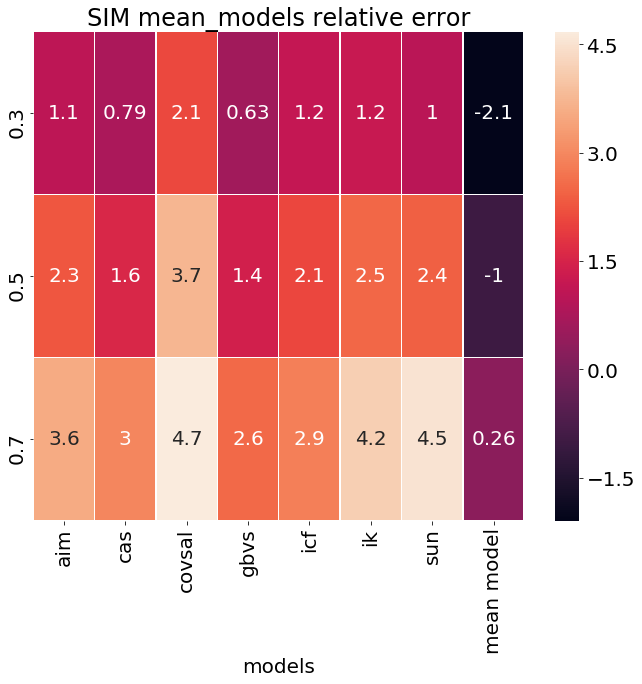

In [41]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_context_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('{} mean_models relative error'.format(plot_metric));
# plt.savefig(save_dir+'{}_mean_contexts_diff.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

### Bar Plot Vizualization for Different $\alpha$ Wace Weight

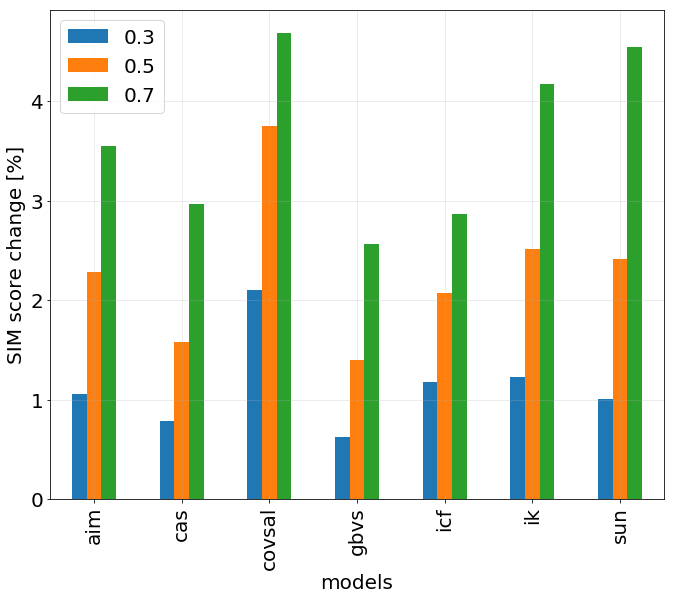

In [42]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

matplotlib.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
# plt.title('Weight of face influence')
plt.ylabel('{} score change [%]'.format(plot_metric));
plt.grid(alpha=0.3)


# plt.savefig(save_dir+'{}_improvment_mean_contexts.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

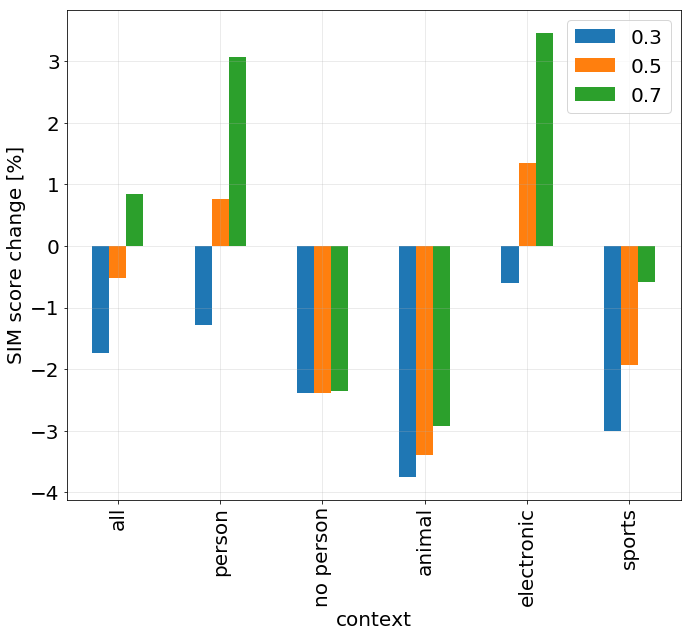

In [43]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel('{} score change [%]'.format(plot_metric));


# plt.savefig(save_dir+'{}_improvment_mean_model.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

### Merge The Plots 

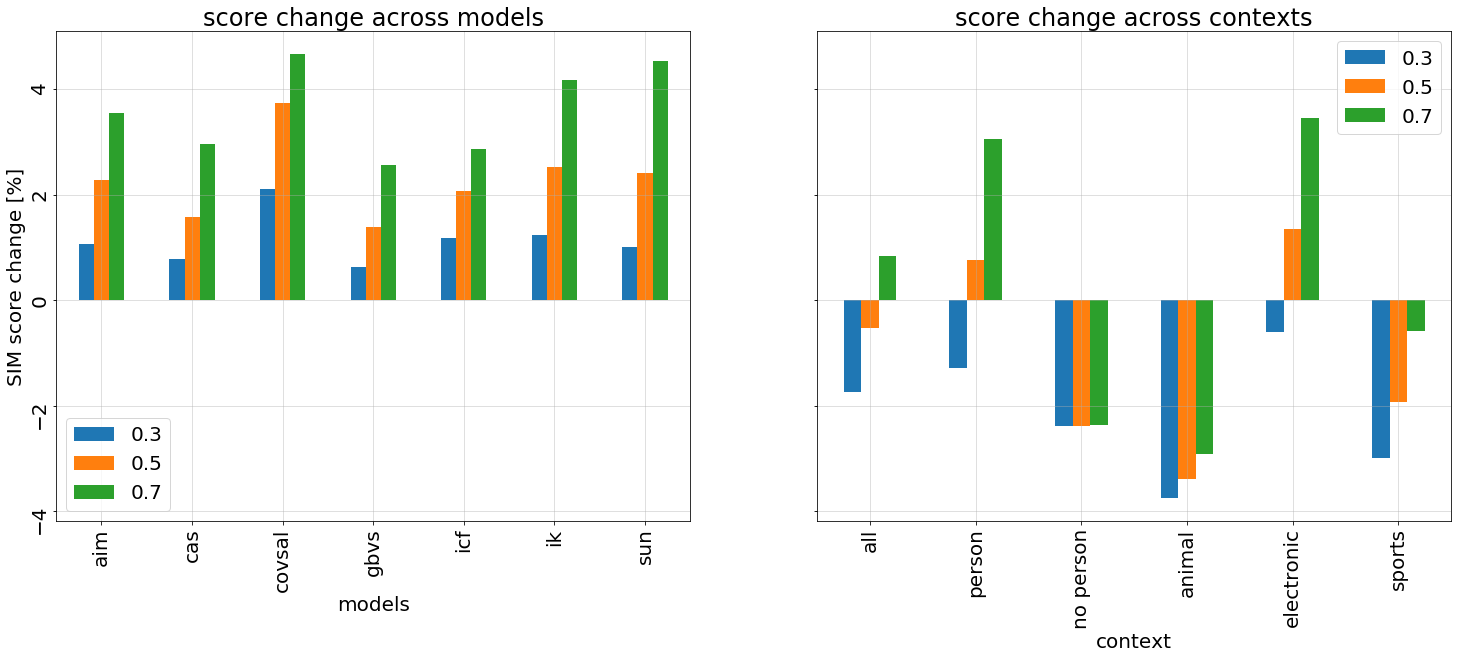

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

mean_context_diff.plot.bar(ax=ax[0]);
mean_models_diff.plot.bar(ax=ax[1]);

mappable = im.get_children()[0]

ax[0].set_title('score change across models')
ax[1].set_title('score change across contexts')

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

ax[0].set_ylabel('{} score change [%]'.format(plot_metric));


# plt.savefig(save_dir+'{}_improvements_mean_both.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

Text(195.0, 0.5, '$\\alpha$ face weight')

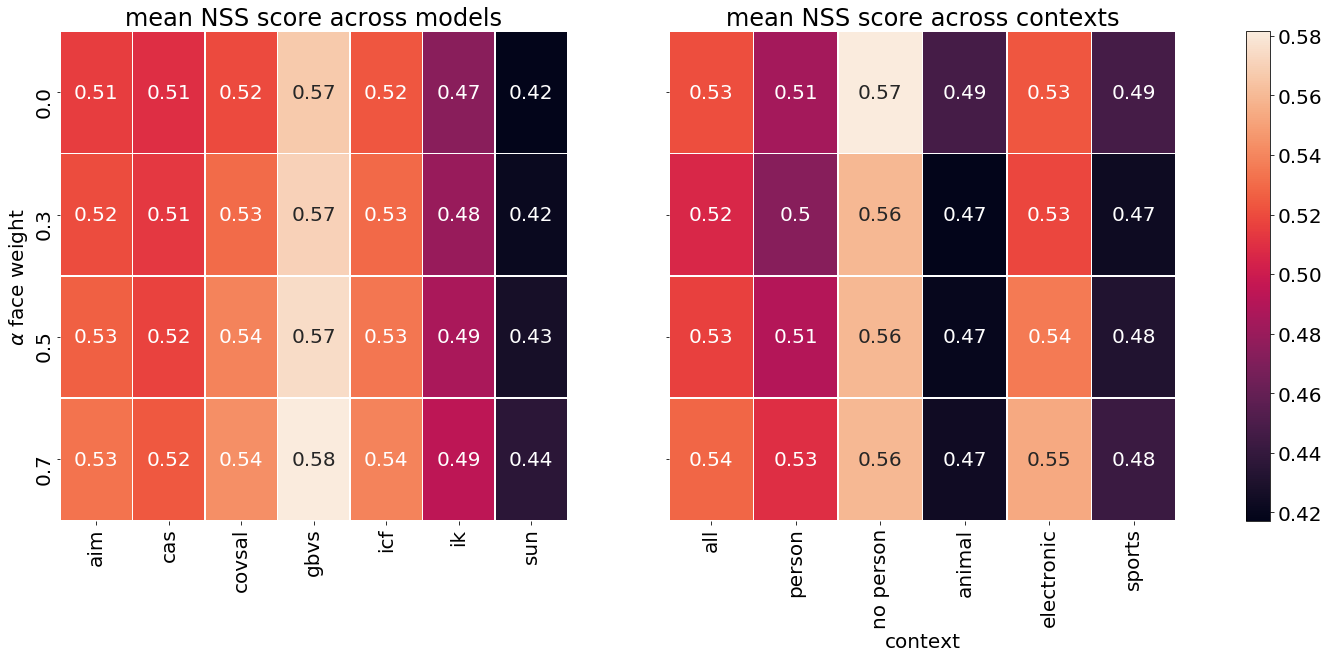

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

im = sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax[1], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('mean NSS score across models'.format(plot_metric))
ax[1].set_title('mean NSS score across contexts'.format(plot_metric))

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

ax[0].set_ylabel(r'$\alpha$ face weight')

# plt.savefig(save_dir+'NSS_performance_mean_both.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)